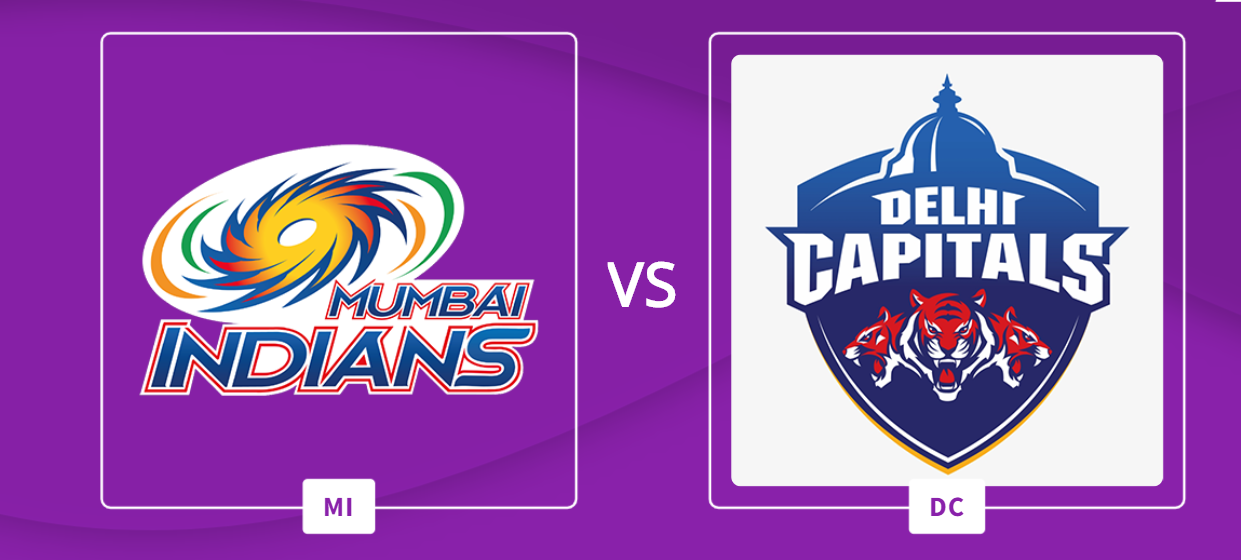

In [294]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

## Load the dataset

In [295]:
wpl = pd.read_csv("matches.csv")
wpl_del = pd.read_csv("deliveries.csv")

## Dataset for matches played by Mumbai Indians

In [296]:
wpl_data_MB = wpl[ (wpl.team1 == 'Mumbai Indians') | (wpl.team2 == 'Mumbai Indians') ]
wpl_data_MB.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
11,12,2017,Bangalore,2017-04-14,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,KA Pollard,M Chinnaswamy Stadium,KN Ananthapadmanabhan,AK Chaudhary,NaN
15,16,2017,Mumbai,2017-04-16,Gujarat Lions,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,N Rana,Wankhede Stadium,A Nand Kishore,S Ravi,NaN


## Data set for Matches played by Delhi Daredevils/Delhi Capitals

In [297]:
wpl_data_DC = wpl[((wpl.team1 == 'Delhi Daredevils') | (wpl.team1 == 'Delhi Capitals')) | ((wpl.team2 == 'Delhi Daredevils') | (wpl.team2 == 'Delhi Capitals'))]
wpl_data_DC.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
741,11337,2019,Delhi,28/04/19,Delhi Capitals,Royal Challengers Bangalore,Delhi Capitals,bat,normal,0,Delhi Capitals,16,0,S Dhawan,Feroz Shah Kotla Ground,Bruce Oxenford,KN Ananthapadmanabhan,C Shamshuddin
745,11341,2019,Chennai,01/05/19,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,normal,0,Chennai Super Kings,80,0,MS Dhoni,M. A. Chidambaram Stadium,Anil Dandekar,Nitin Menon,Ian Gould
748,11344,2019,Delhi,04/05/19,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,bat,normal,0,Delhi Capitals,0,5,A Mishra,Feroz Shah Kotla Ground,Ian Gould,Anil Dandekar,Nitin Menon
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


## Dataset for matches played by Mumbai Indians and Delhi Capitals agains each other

In [298]:
wpl_data_DC_MB = wpl[ ((wpl.team1 == 'Mumbai Indians') & ((wpl.team2 == 'Delhi Daredevils') | (wpl.team2 == 'Delhi Capitals'))) | ((wpl.team2 == 'Mumbai Indians') & ((wpl.team1 == 'Delhi Daredevils') | (wpl.team1 == 'Delhi Capitals'))) ]
wpl_data_DC_MB.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
622,623,2016,Visakhapatnam,2016-05-15,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,80,0,KH Pandya,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Nitin Menon,CK Nandan,NaN
644,7902,2018,Mumbai,14/04/18,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,7,JJ Roy,Wankhede Stadium,K Ananthapadmanabhan,Nitin Menon,Rod Tucker
690,7948,2018,Delhi,20/05/18,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,bat,normal,0,Delhi Daredevils,11,0,A Mishra,Feroz Shah Kotla,Kumar Dharmasena,O Nandan,Vineet Kulkarni
698,11139,2019,Mumbai,24/03/19,Delhi Capitals,Mumbai Indians,Mumbai Indians,field,normal,0,Delhi Capitals,37,0,RR Pant,Wankhede Stadium,S Ravi,Yeshwant Barde,O Nandan
729,11325,2019,Delhi,18/04/19,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,normal,0,Mumbai Indians,40,0,HH Pandya,Feroz Shah Kotla Ground,Nigel Llong,Bruce Oxenford,Anil Chaudhary


###############################################################################################################################

# Part 1 : Who Will Win The Match?

###############################################################################################################################

## <font color = 'red'>Number of matches played and winning rate of Mumbai Indians</font>

In [534]:
#EDA
print(wpl_data_MB.info(), '\n\n', wpl_data_MB.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 1 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               187 non-null    int64 
 1   season           187 non-null    int64 
 2   city             184 non-null    object
 3   date             187 non-null    object
 4   team1            187 non-null    object
 5   team2            187 non-null    object
 6   toss_winner      187 non-null    object
 7   toss_decision    187 non-null    object
 8   result           187 non-null    object
 9   dl_applied       187 non-null    int64 
 10  winner           187 non-null    object
 11  win_by_runs      187 non-null    int64 
 12  win_by_wickets   187 non-null    int64 
 13  player_of_match  187 non-null    object
 14  venue            187 non-null    object
 15  umpire1          187 non-null    object
 16  umpire2          187 non-null    object
 17  umpire3          30 non-null     ob

In [535]:
print(wpl_data_MB.team1.unique(), '\n\n', wpl_data_MB.team2.unique())

['Mumbai Indians' 'Kolkata Knight Riders' 'Sunrisers Hyderabad'
 'Royal Challengers Bangalore' 'Gujarat Lions' 'Kings XI Punjab'
 'Rising Pune Supergiant' 'Chennai Super Kings' 'Rajasthan Royals'
 'Deccan Chargers' 'Delhi Daredevils' 'Pune Warriors'
 'Rising Pune Supergiants' 'Delhi Capitals'] 

 ['Rising Pune Supergiant' 'Mumbai Indians' 'Delhi Daredevils'
 'Sunrisers Hyderabad' 'Kolkata Knight Riders'
 'Royal Challengers Bangalore' 'Deccan Chargers' 'Rajasthan Royals'
 'Chennai Super Kings' 'Kings XI Punjab' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Rising Pune Supergiants' 'Gujarat Lions'
 'Delhi Capitals']


In [536]:
No_matches_MB = wpl_data_MB.shape[0]
print("Number of matches played by Mumbai Indians are: ",No_matches_MB)

Number of matches played by Mumbai Indians are:  187


In [537]:
wpl_data_MB.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [538]:
# Winning details of Mumbai indians
MB_winner = wpl_data_MB[wpl_data_MB.winner == 'Mumbai Indians']
MB_winner.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
11,12,2017,Bangalore,2017-04-14,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,KA Pollard,M Chinnaswamy Stadium,KN Ananthapadmanabhan,AK Chaudhary,NaN
15,16,2017,Mumbai,2017-04-16,Gujarat Lions,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,N Rana,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
21,22,2017,Indore,2017-04-20,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,JC Buttler,Holkar Cricket Stadium,M Erasmus,C Shamshuddin,NaN


In [539]:
# How many number of times did Mumbai Indians won
print("Mumbai Indians won ",MB_winner.shape[0], " times outof total ", No_matches_MB, " matches according to this dataset")

Mumbai Indians won  109  times outof total  187  matches according to this dataset


### <font color = 'green'> Mumbai Indians won  <u>109</u>  times from  total  <u>187</u>  matches played according to this dataset</font>

## <font color = 'red'>Number of matches played and winning rate of Delhi Capitals</font>

In [540]:
#EDA
print(wpl_data_DC.info(), '\n\n', wpl_data_DC.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 4 to 754
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               177 non-null    int64 
 1   season           177 non-null    int64 
 2   city             175 non-null    object
 3   date             177 non-null    object
 4   team1            177 non-null    object
 5   team2            177 non-null    object
 6   toss_winner      177 non-null    object
 7   toss_decision    177 non-null    object
 8   result           177 non-null    object
 9   dl_applied       177 non-null    int64 
 10  winner           175 non-null    object
 11  win_by_runs      177 non-null    int64 
 12  win_by_wickets   177 non-null    int64 
 13  player_of_match  175 non-null    object
 14  venue            177 non-null    object
 15  umpire1          175 non-null    object
 16  umpire2          175 non-null    object
 17  umpire3          29 non-null     ob

In [541]:
print(wpl_data_DC.team1.unique(), '\n\n', wpl_data_DC.team2.unique())

['Royal Challengers Bangalore' 'Delhi Daredevils' 'Sunrisers Hyderabad'
 'Mumbai Indians' 'Gujarat Lions' 'Rajasthan Royals' 'Deccan Chargers'
 'Chennai Super Kings' 'Kolkata Knight Riders' 'Kings XI Punjab'
 'Pune Warriors' 'Delhi Capitals'] 

 ['Delhi Daredevils' 'Rising Pune Supergiant' 'Kings XI Punjab'
 'Kolkata Knight Riders' 'Royal Challengers Bangalore'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Mumbai Indians' 'Kochi Tuskers Kerala' 'Pune Warriors'
 'Sunrisers Hyderabad' 'Rising Pune Supergiants' 'Delhi Capitals']


In [542]:
No_matches_DC = wpl_data_DC.shape[0]
print("Number of matches played by Delhi Daredevils/Delhi Capitals are: ",No_matches_DC)

Number of matches played by Delhi Daredevils/Delhi Capitals are:  177


In [543]:
# Winning details of Delhi Daredevils/Delhi Capitals
DC_winner = wpl_data_DC[(wpl_data_DC.winner == 'Delhi Daredevils') | (wpl_data_DC.winner == 'Delhi Capitals')]
DC_winner.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
732,11328,2019,Delhi,20/04/19,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,5,SS Iyer,Feroz Shah Kotla Ground,Ulhas Gandhe,C Shamshuddin,Bruce Oxenford
735,11331,2019,Jaipur,22/04/19,Rajasthan Royals,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,6,RR Pant,Sawai Mansingh Stadium,S Ravi,Nanda Kishore,Yeshwant Barde
741,11337,2019,Delhi,28/04/19,Delhi Capitals,Royal Challengers Bangalore,Delhi Capitals,bat,normal,0,Delhi Capitals,16,0,S Dhawan,Feroz Shah Kotla Ground,Bruce Oxenford,KN Ananthapadmanabhan,C Shamshuddin
748,11344,2019,Delhi,04/05/19,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,bat,normal,0,Delhi Capitals,0,5,A Mishra,Feroz Shah Kotla Ground,Ian Gould,Anil Dandekar,Nitin Menon
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


In [544]:
# How many number of times did  Delhi Daredevils/ Delhi Capitals won
print("Delhi Daredevils/Delhi Capitals won ",DC_winner.shape[0], " times outof total ", No_matches_DC, " matches according to this dataset")

Delhi Daredevils/Delhi Capitals won  77  times outof total  177  matches according to this dataset


### <font color = 'green'> Delhi Daredevils/Delhi Capitals won  <u> 77 </u>  times  from total  <u> 177 </u>  matches played according to this dataset </font>

## <font color = 'red'> Analysis of Matches played among Delhi Capitals/ delhi Daredevils and Mumbai indians</font>

In [545]:
#EDA
print(wpl_data_DC_MB.info(), '\n\n', wpl_data_DC_MB.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 23 to 729
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               24 non-null     int64 
 1   season           24 non-null     int64 
 2   city             24 non-null     object
 3   date             24 non-null     object
 4   team1            24 non-null     object
 5   team2            24 non-null     object
 6   toss_winner      24 non-null     object
 7   toss_decision    24 non-null     object
 8   result           24 non-null     object
 9   dl_applied       24 non-null     int64 
 10  winner           24 non-null     object
 11  win_by_runs      24 non-null     int64 
 12  win_by_wickets   24 non-null     int64 
 13  player_of_match  24 non-null     object
 14  venue            24 non-null     object
 15  umpire1          24 non-null     object
 16  umpire2          24 non-null     object
 17  umpire3          4 non-null      ob

In [546]:
print(wpl_data_DC_MB.team1.unique(), '\n\n', wpl_data_DC_MB.team2.unique())

['Mumbai Indians' 'Delhi Daredevils' 'Delhi Capitals'] 

 ['Delhi Daredevils' 'Mumbai Indians' 'Delhi Capitals']


In [547]:
No_matches_DC_MB = wpl_data_DC_MB.shape[0]
print("Number of matches played between Delhi Capitlas/Delhi Daredevils and Mumbai Indians are ", No_matches_DC_MB)

Number of matches played between Delhi Capitlas/Delhi Daredevils and Mumbai Indians are  24


In [548]:
# Winning details of Delhi Daredevils/Delhi Capitals
DC_ = wpl_data_DC_MB[(wpl_data_DC_MB.winner == 'Delhi Daredevils') | (wpl_data_DC_MB.winner == 'Delhi Capitals')]
DC_.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,winner_new
538,539,2015,Delhi,2015-04-23,Delhi Daredevils,Mumbai Indians,Mumbai Indians,field,normal,0,Delhi Daredevils,37,0,SS Iyer,Feroz Shah Kotla,SD Fry,CK Nandan,NaN,Delhi Capitals
592,593,2016,Delhi,2016-04-23,Delhi Daredevils,Mumbai Indians,Mumbai Indians,field,normal,0,Delhi Daredevils,10,0,SV Samson,Feroz Shah Kotla,S Ravi,C Shamshuddin,NaN,Delhi Capitals
644,7902,2018,Mumbai,14/04/18,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,7,JJ Roy,Wankhede Stadium,K Ananthapadmanabhan,Nitin Menon,Rod Tucker,Delhi Capitals
690,7948,2018,Delhi,20/05/18,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,bat,normal,0,Delhi Daredevils,11,0,A Mishra,Feroz Shah Kotla,Kumar Dharmasena,O Nandan,Vineet Kulkarni,Delhi Capitals
698,11139,2019,Mumbai,24/03/19,Delhi Capitals,Mumbai Indians,Mumbai Indians,field,normal,0,Delhi Capitals,37,0,RR Pant,Wankhede Stadium,S Ravi,Yeshwant Barde,O Nandan,Delhi Capitals


In [549]:
# Winning details of Mumbai Indians
MB_ = wpl_data_DC_MB[wpl_data_DC_MB.winner == 'Mumbai Indians']
MB_.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,winner_new
389,390,2013,Mumbai,2013-04-09,Mumbai Indians,Delhi Daredevils,Mumbai Indians,bat,normal,0,Mumbai Indians,44,0,KD Karthik,Wankhede Stadium,M Erasmus,VA Kulkarni,NaN,Mumbai Indians
507,508,2014,Mumbai,2014-05-23,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,15,0,MEK Hussey,Wankhede Stadium,S Ravi,RJ Tucker,NaN,Mumbai Indians
555,556,2015,Mumbai,2015-05-05,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,bat,normal,0,Mumbai Indians,0,5,Harbhajan Singh,Wankhede Stadium,HDPK Dharmasena,CB Gaffaney,NaN,Mumbai Indians
622,623,2016,Visakhapatnam,2016-05-15,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,80,0,KH Pandya,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Nitin Menon,CK Nandan,NaN,Mumbai Indians
729,11325,2019,Delhi,18/04/19,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,normal,0,Mumbai Indians,40,0,HH Pandya,Feroz Shah Kotla Ground,Nigel Llong,Bruce Oxenford,Anil Chaudhary,Mumbai Indians


In [550]:
print("Mumbai Indians won ", MB_.shape[0], " times from the total number of ", No_matches_DC_MB, " matches played between them.")
print("Delhi Capitals won ", DC_.shape[0], " times from the total number of ", No_matches_DC_MB, " matches played between them.")

Mumbai Indians won  12  times from the total number of  24  matches played between them.
Delhi Capitals won  12  times from the total number of  24  matches played between them.


In [551]:
wpl_data_DC_MB ['winner_new'] = wpl_data_DC_MB['winner'].replace(['Delhi Daredevils'], 'Delhi Capitals')


<ipython-input-551-c992c997809a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wpl_data_DC_MB ['winner_new'] = wpl_data_DC_MB['winner'].replace(['Delhi Daredevils'], 'Delhi Capitals')


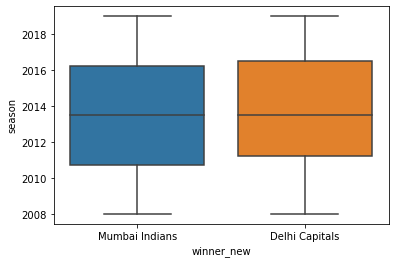

In [552]:
sns.boxplot(x= 'winner_new', y ='season', data = wpl_data_DC_MB)

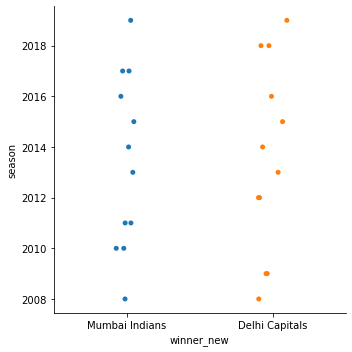

In [553]:
sns.catplot(x= 'winner_new', y ='season', data = wpl_data_DC_MB)

### From the above data of matches played by Delhi capitals and Mumbai Indians against each other shows that both teams have equal capability of winning this match against each other

### <font color = 'brown'>But, when we look at the other datasets such as <u>wpl_data_DC</u> and <u>wpl_data_MB</u> it shows a slightly different picture , let's have a look at the basic analysis done from it</font>

### Winning percentage

In [554]:
# Winning Percentage of Delhi Capitals
p_win_DC = (DC_winner.shape[0]/No_matches_DC)*100
print("Delhi Capitals winning percentage is : ",p_win_DC)

Delhi Capitals winning percentage is :  43.50282485875706


In [555]:
# Winning Percentage of Mumbai Indians
p_win_MB = (MB_winner.shape[0]/No_matches_MB)*100
print("Mumbai Indians winning percentage is : ",p_win_MB)

Mumbai Indians winning percentage is :  58.288770053475936


# Conclusion
### <font color = "Blue">Mumbai Indians have higher winning percentage <u>(58.29%)</u> than Delhi Capitals <u>(43.50%)</u> which gives a slighly uppen hand for Mumabai Indians according to this analysis.</font>

## <font color = 'pink'> No Match is won without a team efforts and individual capabilities of players do add up to the overall performace of the particular team and that could be a deciding factor of particular teams possibility of winning.</font>

## TODO Hypothesis Testing

###############################################################################################################################

# Part 2 : Toss Winning Decision

###############################################################################################################################

### What will the toss winning captain decide to do first?

## <font color = "red"> Mumbai Indians</font> 

In [556]:
 wpl_data_MB_toss =  wpl_data_MB[wpl_data_MB.toss_winner == 'Mumbai Indians']

### Toss decisions taken by Mumbai Indians

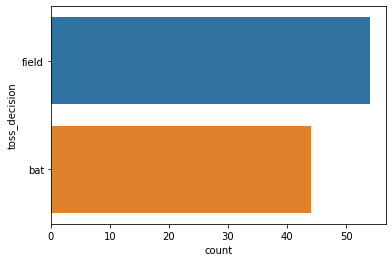

In [557]:
sns.countplot(y="toss_decision",data=wpl_data_MB_toss)

### Toss Decision and Winning parameter of Mumbai Inidans

In [558]:
win_loss = []
for i in wpl_data_MB_toss.winner.values:
    if i == 'Mumbai Indians':
        win_loss.append('won') 
    else:
        win_loss.append('lost')
        

In [559]:
wpl_data_MB_toss["Win_loss"] = win_loss

<ipython-input-559-38daefef4fdc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wpl_data_MB_toss["Win_loss"] = win_loss


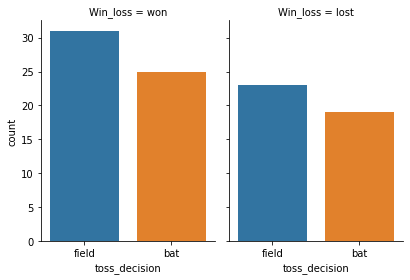

In [560]:
sns.catplot(x="toss_decision", col="Win_loss",
                data=wpl_data_MB_toss, kind="count",
                height=4, aspect=.7);

In [561]:
wpl_data_MB_toss.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'Win_loss'],
      dtype='object')

In [562]:
MB_field_no = wpl_data_MB_toss[wpl_data_MB_toss.toss_decision == "field"]
MB_win_field_no = wpl_data_MB_toss[(wpl_data_MB_toss.toss_decision == "field") & (wpl_data_MB_toss.Win_loss == "won")]
MB_lo_field_no = wpl_data_MB_toss[(wpl_data_MB_toss.toss_decision == "field") & (wpl_data_MB_toss.Win_loss == "lost")]

MB_bat_no = wpl_data_MB_toss[wpl_data_MB_toss.toss_decision == "bat"]
MB_win_bat_no = wpl_data_MB_toss[(wpl_data_MB_toss.toss_decision == "bat") & (wpl_data_MB_toss.Win_loss == "won")]
MB_lo_bat_no = wpl_data_MB_toss[(wpl_data_MB_toss.toss_decision == "bat") & (wpl_data_MB_toss.Win_loss == "lost")]

print("No. of times Mumbai Inidans Decided to Field after winning a toss: ",MB_field_no.shape[0])
print("No. of times Mumbai Indians won after deciding to field first: ", MB_win_field_no.shape[0])
print("No. of times Mumbai Indians lost after deciding to field first: ", MB_lo_field_no.shape[0])

print("\n\nNo. of times Mumbai Inidans Decided to Bat after winning a toss: ",MB_bat_no.shape[0])
print("No. of times Mumbai Indians won after deciding to bat first: ", MB_win_bat_no.shape[0])
print("No. of times Mumbai Indians lost after deciding to bat first: ", MB_lo_bat_no.shape[0])



No. of times Mumbai Inidans Decided to Field after winning a toss:  54
No. of times Mumbai Indians won after deciding to field first:  31
No. of times Mumbai Indians lost after deciding to field first:  23


No. of times Mumbai Inidans Decided to Bat after winning a toss:  44
No. of times Mumbai Indians won after deciding to bat first:  25
No. of times Mumbai Indians lost after deciding to bat first:  19


In [563]:
# Success Rate after Deciding to field first is:
f_s_rate = (MB_win_field_no.shape[0]/MB_field_no.shape[0])*100
f_s_rate

57.407407407407405

In [564]:
b_s_rate = (MB_win_bat_no.shape[0]/MB_bat_no.shape[0])*100
b_s_rate

56.81818181818182

### <font color ='green'> From above analysis it looks like Mumbai Indians has better chance of winning if they decide to Field first after winning a toss.</font>

## <font color ='red'> Delhi Capitals</font>

In [565]:
wpl_data_DC_toss =  wpl_data_DC[(wpl_data_DC.toss_winner == 'Delhi Daredevils') | (wpl_data_DC.toss_winner == 'Delhi Capitals')]
#wpl_data_DC_toss

### Toss decisions taken by Delhi capitals

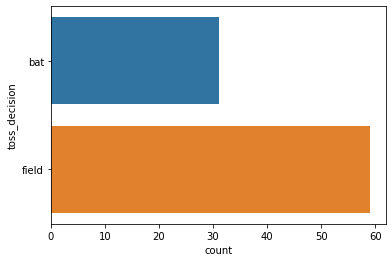

In [566]:
sns.countplot(y="toss_decision",data=wpl_data_DC_toss)

### Toss Decision and Winning parameter of Delhi Capitals

In [567]:
win_loss = []
for i in wpl_data_DC_toss.winner.values:
    if i == 'Delhi Daredevils':
        win_loss.append('won')
    elif i == 'Delhi Capitals':
        win_loss.append('won')
    else:
        win_loss.append('lost')

In [568]:
wpl_data_DC_toss["Win_loss"] = win_loss

<ipython-input-568-f1c336b61993>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wpl_data_DC_toss["Win_loss"] = win_loss


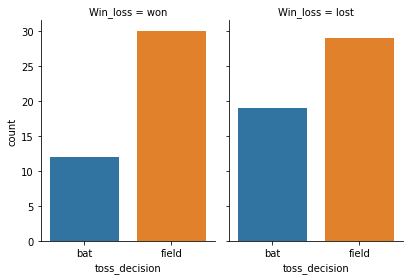

In [569]:
sns.catplot(x="toss_decision", col="Win_loss",
                data=wpl_data_DC_toss, kind="count",
                height=4, aspect=.7);

In [570]:
DC_field_no = wpl_data_DC_toss[wpl_data_DC_toss.toss_decision == "field"]
DC_win_field_no = wpl_data_DC_toss[(wpl_data_DC_toss.toss_decision == "field") & (wpl_data_DC_toss.Win_loss == "won")]
DC_lo_field_no = wpl_data_DC_toss[(wpl_data_DC_toss.toss_decision == "field") & (wpl_data_DC_toss.Win_loss == "lost")]

DC_bat_no = wpl_data_DC_toss[wpl_data_DC_toss.toss_decision == "bat"]
DC_win_bat_no = wpl_data_DC_toss[(wpl_data_DC_toss.toss_decision == "bat") & (wpl_data_DC_toss.Win_loss == "won")]
DC_lo_bat_no = wpl_data_DC_toss[(wpl_data_DC_toss.toss_decision == "bat") & (wpl_data_DC_toss.Win_loss == "lost")]

print("No. of times Delhi capitals Decided to Field after winning a toss: ",DC_field_no.shape[0])
print("No. of times Delhi capitals won after deciding to field first: ", DC_win_field_no.shape[0])
print("No. of times Delhi capitals lost after deciding to field first: ", DC_lo_field_no.shape[0])

print("\n\nNo. of times Delhi capitals Decided to Bat after winning a toss: ",DC_bat_no.shape[0])
print("No. of times Delhi capitals won after deciding to bat first: ", DC_win_bat_no.shape[0])
print("No. of times Delhi capitals lost after deciding to bat first: ", DC_lo_bat_no.shape[0])


No. of times Delhi capitals Decided to Field after winning a toss:  59
No. of times Delhi capitals won after deciding to field first:  30
No. of times Delhi capitals lost after deciding to field first:  29


No. of times Delhi capitals Decided to Bat after winning a toss:  31
No. of times Delhi capitals won after deciding to bat first:  12
No. of times Delhi capitals lost after deciding to bat first:  19


In [571]:
# Success Rate after Deciding to field first is:
f_s_rate_ = (DC_win_field_no.shape[0]/DC_field_no.shape[0])*100
f_s_rate_


50.847457627118644

In [572]:
# Success Rate after Deciding to bat first is:
b_s_rate_ = (DC_win_bat_no.shape[0]/DC_bat_no.shape[0])*100
b_s_rate_


38.70967741935484

### <font color ='green'> From above analysis it looks like Delhi Capitals has better chance of winning if they decide to Field first after winning a toss.</font>

## <font color ='red'> What about choosing fielding and batting first after winning a toss when Mumbai Indians and Delhi capitals face to face.</font>

In [573]:
wpl_data_DC_toss_ =  wpl_data_DC_MB[(wpl_data_DC_MB.toss_winner == 'Delhi Daredevils') | (wpl_data_DC.toss_winner == 'Delhi Capitals')]
wpl_data_MB_toss_ =  wpl_data_DC_MB[wpl_data_DC_MB.toss_winner == 'Mumbai Indians']
#wpl_data_DC_toss_

<ipython-input-573-8db2c98cf7ee>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wpl_data_DC_toss_ =  wpl_data_DC_MB[(wpl_data_DC_MB.toss_winner == 'Delhi Daredevils') | (wpl_data_DC.toss_winner == 'Delhi Capitals')]


### Toss Decision and Winning parameter of Delhi Capitals

In [574]:
win_loss_D = []
for i in wpl_data_DC_toss_.winner.values:
    if i == 'Delhi Daredevils':
        win_loss_D.append('won')
    elif i == 'Delhi Capitals':
        win_loss_D.append('won')
    else:
        win_loss_D.append('lost')

In [575]:
wpl_data_MB_toss_.winner.values

array(['Delhi Daredevils', 'Mumbai Indians', 'Delhi Daredevils',
       'Mumbai Indians', 'Delhi Daredevils', 'Delhi Daredevils',
       'Delhi Daredevils', 'Delhi Daredevils', 'Delhi Capitals',
       'Mumbai Indians'], dtype=object)

In [576]:
win_loss_M = []
for i in wpl_data_MB_toss_.winner.values:
    if i == 'Mumbai Indians':
        win_loss_M.append('won')
    else:
        win_loss_M.append('lost')

In [577]:
wpl_data_DC_toss_["Win_loss"] = win_loss_D
wpl_data_MB_toss_["Win_loss"] = win_loss_M

<ipython-input-577-95fe4b88f780>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wpl_data_DC_toss_["Win_loss"] = win_loss_D
<ipython-input-577-95fe4b88f780>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wpl_data_MB_toss_["Win_loss"] = win_loss_M


In [578]:
DC_field_no_ = wpl_data_DC_toss_[wpl_data_DC_toss_.toss_decision == "field"]
DC_win_field_no_ = wpl_data_DC_toss_[(wpl_data_DC_toss_.toss_decision == "field") & (wpl_data_DC_toss_.Win_loss == "won")]
DC_lo_field_no_ = wpl_data_DC_toss_[(wpl_data_DC_toss_.toss_decision == "field") & (wpl_data_DC_toss_.Win_loss == "lost")]

DC_bat_no_ = wpl_data_DC_toss_[wpl_data_DC_toss_.toss_decision == "bat"]
DC_win_bat_no_ = wpl_data_DC_toss_[(wpl_data_DC_toss_.toss_decision == "bat") & (wpl_data_DC_toss_.Win_loss == "won")]
DC_lo_bat_no_ = wpl_data_DC_toss_[(wpl_data_DC_toss_.toss_decision == "bat") & (wpl_data_DC_toss_.Win_loss == "lost")]

print("No. of times Delhi capitals Decided to Field after winning a toss: ",DC_field_no_.shape[0])
print("No. of times Delhi capitals won after deciding to field first: ", DC_win_field_no_.shape[0])
print("No. of times Delhi capitals lost after deciding to field first: ", DC_lo_field_no_.shape[0])

print("\n\nNo. of times Delhi capitals Decided to Bat after winning a toss: ",DC_bat_no_.shape[0])
print("No. of times Delhi capitals won after deciding to bat first: ", DC_win_bat_no_.shape[0])
print("No. of times Delhi capitals lost after deciding to bat first: ", DC_lo_bat_no_.shape[0])


No. of times Delhi capitals Decided to Field after winning a toss:  11
No. of times Delhi capitals won after deciding to field first:  4
No. of times Delhi capitals lost after deciding to field first:  7


No. of times Delhi capitals Decided to Bat after winning a toss:  3
No. of times Delhi capitals won after deciding to bat first:  1
No. of times Delhi capitals lost after deciding to bat first:  2


In [579]:
MB_field_no_ = wpl_data_MB_toss_[wpl_data_MB_toss_.toss_decision == "field"]
MB_win_field_no_ = wpl_data_MB_toss_[(wpl_data_MB_toss_.toss_decision == "field") & (wpl_data_MB_toss_.Win_loss == "won")]
MB_lo_field_no_ = wpl_data_MB_toss_[(wpl_data_MB_toss_.toss_decision == "field") & (wpl_data_MB_toss_.Win_loss == "lost")]

MB_bat_no_ = wpl_data_MB_toss_[wpl_data_MB_toss_.toss_decision == "bat"]
MB_win_bat_no_ = wpl_data_MB_toss_[(wpl_data_MB_toss_.toss_decision == "bat") & (wpl_data_MB_toss_.Win_loss == "won")]
MB_lo_bat_no_ = wpl_data_MB_toss_[(wpl_data_MB_toss_.toss_decision == "bat") & (wpl_data_MB_toss_.Win_loss == "lost")]

print("No. of times Mumbai Inidans Decided to Field after winning a toss: ",MB_field_no_.shape[0])
print("No. of times Mumbai Indians won after deciding to field first: ", MB_win_field_no_.shape[0])
print("No. of times Mumbai Indians lost after deciding to field first: ", MB_lo_field_no_.shape[0])

print("\n\nNo. of times Mumbai Inidans Decided to Bat after winning a toss: ",MB_bat_no_.shape[0])
print("No. of times Mumbai Indians won after deciding to bat first: ", MB_win_bat_no_.shape[0])
print("No. of times Mumbai Indians lost after deciding to bat first: ", MB_lo_bat_no_.shape[0])


No. of times Mumbai Inidans Decided to Field after winning a toss:  4
No. of times Mumbai Indians won after deciding to field first:  0
No. of times Mumbai Indians lost after deciding to field first:  4


No. of times Mumbai Inidans Decided to Bat after winning a toss:  6
No. of times Mumbai Indians won after deciding to bat first:  3
No. of times Mumbai Indians lost after deciding to bat first:  3


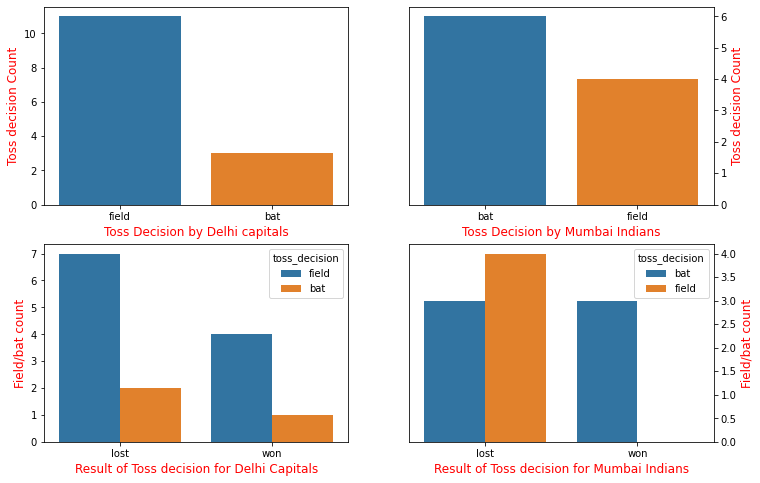

In [580]:
f, axes = plt.subplots(2, 2, figsize=(12,8))
sns.countplot(x="toss_decision",data=wpl_data_DC_toss_, ax = axes[0,0])
axes[0,0].set_ylabel('Toss decision Count', fontsize=12, color ='red')
axes[0,0].set_xlabel('Toss Decision by Delhi capitals', fontsize=12, color ='red')
axes[0,0].yaxis.tick_left()

sns.countplot(x="toss_decision",data=wpl_data_MB_toss_, ax = axes[0,1])
axes[0,1].set_ylabel('Toss decision Count', fontsize=12, color ='red')
axes[0,1].set_xlabel('Toss Decision by Mumbai Indians', fontsize=12, color ='red')
axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()


sns.countplot(x="Win_loss", hue="toss_decision",data=wpl_data_DC_toss_, ax = axes[1,0])
axes[1,0].set_xlabel('Result of Toss decision for Delhi Capitals', fontsize=12, color ='red')
axes[1,0].set_ylabel('Field/bat count', fontsize=12, color ='red')

sns.countplot(x="Win_loss", hue="toss_decision",data=wpl_data_MB_toss_, ax = axes[1,1])
axes[1,1].set_xlabel('Result of Toss decision for Mumbai Indians', fontsize=12, color ='red')
axes[1,1].set_ylabel('Field/bat count', fontsize=12, color ='red')
axes[1,1].yaxis.set_label_position("right")
axes[1,1].yaxis.tick_right()


plt.show()


## <font color = "dark red">Here we see the total contrast of Winning possibility of both the teams with respect to the toss decision made</font>

# Conclusion
## Mumbai Indians and Delhi Capitals when playing against each other

In [581]:
# Success Rate after Deciding to fieldor bat first is:
f_s_rate_M = (MB_win_field_no_.shape[0]/MB_field_no_.shape[0])*100
b_s_rate_M = (MB_win_bat_no_.shape[0]/MB_bat_no_.shape[0])*100
print("Mumbai Inidans")
print("Percentage of winning the match after deciding to Field 1st when playing against Delhi Capitals : ", f_s_rate_M)
print("Percentage of winning the match after deciding to Bat 1st when playing against Delhi Capitals : ", b_s_rate_M)


f_s_rate_D = (DC_win_field_no_.shape[0]/DC_field_no_.shape[0])*100
b_s_rate_D = (DC_win_bat_no_.shape[0]/DC_bat_no_.shape[0])*100
print("\nDelhi Capitals")
print("Percentage of winning the match after deciding to Field 1st when playing against Mumbai Indians : ", f_s_rate_D)
print("Percentage of winning the match after deciding to Bat 1st when playing against Mumbai Inidans : ", b_s_rate_D)


Mumbai Inidans
Percentage of winning the match after deciding to Field 1st when playing against Delhi Capitals :  0.0
Percentage of winning the match after deciding to Bat 1st when playing against Delhi Capitals :  50.0

Delhi Capitals
Percentage of winning the match after deciding to Field 1st when playing against Mumbai Indians :  36.36363636363637
Percentage of winning the match after deciding to Bat 1st when playing against Mumbai Inidans :  33.33333333333333


## When playing against other teams (Overall performance after a toss decision(bat/field))

In [582]:
print("Mumbai Inidans")
print("Percentage of winning the match after deciding to Field 1st : ", f_s_rate)
print("Percentage of winning the match after deciding to Bat 1st : ", b_s_rate)

print("\nDelhi Capitals")
print("Percentage of winning the match after deciding to Field 1st : ", f_s_rate_)
print("Percentage of winning the match after deciding to Bat 1st : ", b_s_rate_)


Mumbai Inidans
Percentage of winning the match after deciding to Field 1st :  57.407407407407405
Percentage of winning the match after deciding to Bat 1st :  56.81818181818182

Delhi Capitals
Percentage of winning the match after deciding to Field 1st :  50.847457627118644
Percentage of winning the match after deciding to Bat 1st :  38.70967741935484


# Conclusion:

## <font color ='green'> From Above Anlysis Choosing to Bat first would be the better choice for both the teams.</font>

###############################################################################################################################

# Part 3 : How many runs will Rohit Sharma score?

###############################################################################################################################

In [583]:
wpl_del_RS = wpl_del[wpl_del.batsman == "RG Sharma"]
#wpl_del_RS.batting_team


In [584]:
wpl_del_RS_sort =  wpl_del_RS.sort_values(by = 'batsman_runs', ascending = False)

## details of Rohit Sharma's performance according to dataset

In [585]:
wpl_del_RS_sort.sum(axis = 0, skipna = True)

match_id                                                   6448276
inning                                                        5526
batting_team     Mumbai IndiansMumbai IndiansMumbai IndiansMumb...
bowling_team     Delhi CapitalsDeccan ChargersKolkata Knight Ri...
over                                                         40942
ball                                                         13479
batsman          RG SharmaRG SharmaRG SharmaRG SharmaRG SharmaR...
non_striker      Q de KockKD KarthikKH PandyaAT RayuduKA Pollar...
bowler           K PaulV Pratap SinghPP ChawlaVR AaronA SinghJo...
is_super_over                                                    0
wide_runs                                                       78
bye_runs                                                         2
legbye_runs                                                     50
noball_runs                                                     13
penalty_runs                                                  

In [586]:
wpl_del_RGS_ = wpl_del_RS_sort[(wpl_del_RS_sort.bowling_team == "Delhi Daredevils") | (wpl_del_RS_sort.bowling_team == "Delhi Capitals")]

## Rohit Sharma's performance when bowling team is Delhi Capitals

In [587]:
wpl_del_RGS_.sum(axis = 0, skipna = True)

match_id                                                    788070
inning                                                         769
batting_team     Mumbai IndiansMumbai IndiansMumbai IndiansMumb...
bowling_team     Delhi CapitalsDelhi DaredevilsDelhi Daredevils...
over                                                          5702
ball                                                          1948
batsman          RG SharmaRG SharmaRG SharmaRG SharmaRG SharmaR...
non_striker      Q de KockKD KarthikSR TendulkarAT RayuduSB Sty...
bowler           K PaulM MorkelIK PathanM MorkelR BhatiaR Bhati...
is_super_over                                                    0
wide_runs                                                       11
bye_runs                                                         0
legbye_runs                                                      5
noball_runs                                                      1
penalty_runs                                                  

In [588]:
# TODO Plot

## Descriptive statistics for runs scored by Rohit Sharma against Delhi Capitals

In [589]:
wpl_del_RGS_[['wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs','penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs']].describe()

,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,560.000000,560.0,560.000000,560.000000,560.0,560.000000,560.000000,560.000000
mean,0.019643,0.0,0.008929,0.001786,0.0,1.335714,0.030357,1.366071
std,0.173277,0.0,0.094152,0.042258,0.0,1.658116,0.200553,1.655454
min,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,1.000000
75%,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,1.000000
max,3.000000,0.0,1.000000,1.000000,0.0,7.000000,3.000000,8.000000


## Top 10 scores' details of Rohit Sharma

In [590]:
wpl_del_RGS_top10 =  wpl_del_RGS_.nlargest(10, ['batsman_runs'])
wpl_del_RGS_top10[['bowler','batsman_runs', 'total_runs', 'over', 'non_striker']]

,bowler,batsman_runs,total_runs,over,non_striker
172793,K Paul,7,8,6,Q de Kock
92202,M Morkel,6,6,7,KD Karthik
80670,IK Pathan,6,6,1,SR Tendulkar
66698,M Morkel,6,6,13,AT Rayudu
22984,R Bhatia,6,6,12,SB Styris
22982,R Bhatia,6,6,12,SB Styris
66709,JR Hopes,6,6,15,AT Rayudu
15374,Mohammad Asif,6,6,16,SB Bangar
15381,R Bhatia,6,6,17,AS Yadav
15384,MF Maharoof,6,6,18,AS Yadav


## Bottom 10 scores' details of Rohit Sharma

In [591]:
wpl_del_RGS_top10 =  wpl_del_RGS_.nsmallest(10, ['batsman_runs'])
wpl_del_RGS_top10[['bowler','batsman_runs', 'total_runs', 'over', 'non_striker']]

,bowler,batsman_runs,total_runs,over,non_striker
147237,A Mishra,0,0,7,MJ Guptill
131884,A Mishra,0,0,16,AT Rayudu
131879,AD Mathews,0,0,15,AT Rayudu
147214,Z Khan,0,0,3,MJ Guptill
147209,CH Morris,0,0,2,MJ Guptill
147220,CH Morris,0,0,4,MJ Guptill
147221,CH Morris,0,0,4,MJ Guptill
147211,Z Khan,0,0,3,MJ Guptill
152354,R Tewatia,0,0,11,Ishan Kishan
152355,R Tewatia,0,0,11,Ishan Kishan


# Conclusion
## <font color = 'sky blue'> Hence, from above descriptive analysis runs scored by RG sharma against Delhi capitals are not more than 15</font>

###############################################################################################################################

# Part 4 : How many Wickets will K Rabada will take in a match?

###############################################################################################################################

In [592]:
wpl_del_KR = wpl_del[wpl_del.bowler == "K Rabada"]

## K Rabada's details

In [593]:
wpl_del_KR.sum(axis = 0, skipna = True)

match_id                                                   3346013
inning                                                         607
batting_team     Mumbai IndiansMumbai IndiansMumbai IndiansMumb...
bowling_team     Delhi DaredevilsDelhi DaredevilsDelhi Daredevi...
over                                                          4804
ball                                                          1568
batsman          PA PatelJC ButtlerJC ButtlerPA PatelJC Buttler...
non_striker      JC ButtlerPA PatelPA PatelJC ButtlerPA PatelPA...
bowler           K RabadaK RabadaK RabadaK RabadaK RabadaK Raba...
is_super_over                                                    0
wide_runs                                                       24
bye_runs                                                         7
legbye_runs                                                     10
noball_runs                                                      2
penalty_runs                                                  

In [594]:
wpl[wpl.player_of_match == "K Rabada"]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
715,11311,2019,Bengaluru,07/04/19,Royal Challengers Bangalore,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,4,K Rabada,M. Chinnaswamy Stadium,S Ravi,Yeshwant Barde,O Nandan


In [595]:
wpl_del_KR.columns


Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [596]:
wpl_del_KR.player_dismissed.unique()

array([nan, 'PA Patel', 'Harbhajan Singh', 'SP Narine', 'MK Pandey',
       'BB McCullum', 'DR Smith', 'AJ Finch', 'RG Sharma', 'BCJ Cutting',
       'Yuvraj Singh', 'KM Jadhav', 'CA Lynn', 'PP Chawla', 'H Viljoen',
       'M Ashwin', 'Mohammed Shami', 'DA Warner', 'AB de Villiers',
       'V Kohli', 'AD Nath', 'P Negi', 'RV Uthappa', 'KD Karthik',
       'V Shankar', 'B Kumar', 'K Ahmed', 'AS Yadav', 'HH Pandya',
       'MA Agarwal', 'R Ashwin', 'SV Samson', 'STR Binny', 'R Parag',
       'Washington Sundar'], dtype=object)

In [597]:
wpl_del_KR.dismissal_kind.unique()

array([nan, 'bowled', 'run out', 'caught'], dtype=object)

In [598]:
wpl_del_KR_wi = wpl_del_KR[(wpl_del_KR.dismissal_kind == 'bowled') | (wpl_del_KR.dismissal_kind == 'run out') | (wpl_del_KR.dismissal_kind == 'caught')]

In [599]:
wpl_del_KR_wi.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [600]:
wpl_del_KR_wi_ = wpl_del_KR_wi[['match_id','bowler','batting_team','bowling_team','player_dismissed', 'dismissal_kind']]

## Wickets by K Rabada

In [601]:
wpl_del_KR_wi_

,match_id,bowler,batting_team,bowling_team,player_dismissed,dismissal_kind
5539,24,K Rabada,Mumbai Indians,Delhi Daredevils,PA Patel,bowled
5632,24,K Rabada,Mumbai Indians,Delhi Daredevils,Harbhajan Singh,run out
7262,31,K Rabada,Kolkata Knight Riders,Delhi Daredevils,SP Narine,bowled
7343,31,K Rabada,Kolkata Knight Riders,Delhi Daredevils,MK Pandey,bowled
9482,41,K Rabada,Gujarat Lions,Delhi Daredevils,BB McCullum,caught
9483,41,K Rabada,Gujarat Lions,Delhi Daredevils,DR Smith,run out
9589,41,K Rabada,Gujarat Lions,Delhi Daredevils,AJ Finch,caught
10290,44,K Rabada,Mumbai Indians,Delhi Daredevils,RG Sharma,caught
165433,11139,K Rabada,Mumbai Indians,Delhi Capitals,BCJ Cutting,caught
165446,11139,K Rabada,Mumbai Indians,Delhi Capitals,Yuvraj Singh,caught


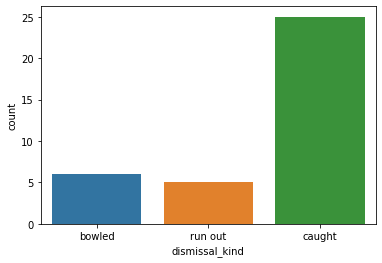

In [602]:
sns.countplot(x="dismissal_kind",data=wpl_del_KR_wi_)

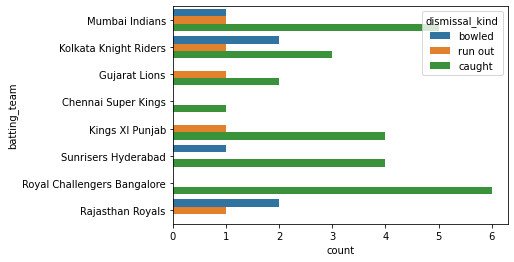

In [603]:
sns.countplot(y ="batting_team",hue="dismissal_kind",data=wpl_del_KR_wi_)

## Performance of K Rabada against Mumbai Indians

In [604]:
wpl_del_KR_wi_MI = wpl_del_KR_wi_[wpl_del_KR_wi_.batting_team =="Mumbai Indians"]
wpl_del_KR_wi_MI

,match_id,bowler,batting_team,bowling_team,player_dismissed,dismissal_kind
5539,24,K Rabada,Mumbai Indians,Delhi Daredevils,PA Patel,bowled
5632,24,K Rabada,Mumbai Indians,Delhi Daredevils,Harbhajan Singh,run out
10290,44,K Rabada,Mumbai Indians,Delhi Daredevils,RG Sharma,caught
165433,11139,K Rabada,Mumbai Indians,Delhi Capitals,BCJ Cutting,caught
165446,11139,K Rabada,Mumbai Indians,Delhi Capitals,Yuvraj Singh,caught
172849,11325,K Rabada,Mumbai Indians,Delhi Capitals,AS Yadav,caught
172877,11325,K Rabada,Mumbai Indians,Delhi Capitals,HH Pandya,caught


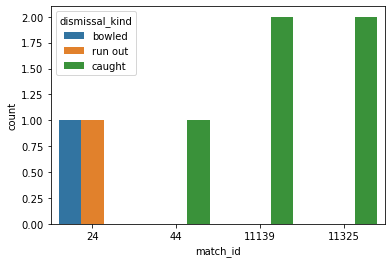

In [605]:
sns.countplot(x ="match_id",hue="dismissal_kind",data=wpl_del_KR_wi_MI)

In [606]:
wpl_del_KR_wi_MI_ = wpl_del_KR_wi_MI.groupby(['match_id'],as_index=False).count()

In [607]:
# Average Wickets taken by K Rabada in a single match against Mumbai Inidans 
print("Average Wickets taken by K Rabada in a single match against Mumbai Inidans is :",wpl_del_KR_wi_MI_['player_dismissed'].mean())

Average Wickets taken by K Rabada in a single match against Mumbai Inidans is : 1.75


# Conclusion
## <font color = "green"> Hence, from above analysis K Rabada would take <u>approximately 2 wickets</u> in a match against Mumbai Indians</font>

###############################################################################################################################

#  Part 5: How many wides will be bowled?

###############################################################################################################################

In [608]:
wpl_del_wide = wpl_del[(wpl_del.bowling_team == "Mumbai Indians") | (wpl_del.bowling_team == "Delhi Daredevils") | (wpl_del.bowling_team == "Delhi Capitals")]

In [609]:
wpl_del_wide.bowling_team.unique()

array(['Mumbai Indians', 'Delhi Daredevils', 'Delhi Capitals'],
      dtype=object)

### Average wides by MI and DC combined

In [610]:
wpl_del_wide['wide_runs'].describe()

count    43205.000000
mean         0.037496
std          0.252534
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: wide_runs, dtype: float64

In [611]:
wpl_del_wide_ = wpl_del_wide[['match_id','wide_runs', 'batting_team', 'bowling_team','bowler' ]]

In [612]:
bowling_team_new = []
for i in wpl_del_wide_.bowling_team.values:
    if i == "Delhi Daredevils":
        bowling_team_new.append('Delhi Capitals')
    else:
        bowling_team_new.append(i)
        


In [613]:
wpl_del_wide_['bowling_team_new'] = bowling_team_new

<ipython-input-613-5579ec37c609>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wpl_del_wide_['bowling_team_new'] = bowling_team_new


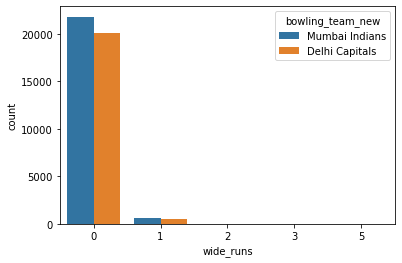

In [614]:
sns.countplot(x="wide_runs",hue = 'bowling_team_new', data=wpl_del_wide_)

# Conclusion
## <font color = 'green'> By looking at above plot it looks like approximately 0-1 wides will be bowled in a match<br> Maximum of 5 wides would be bowled by looking at descriptive analysis of data</font>